# CoMix2 additional analysis

In [15]:
include("main_utils.jl")
include("data_setup.jl")
include("comix2_utils.jl")

default_plot_setting()

Plots.GRBackend()

## Create an introductory figure for the paper
Assuming the body part has the same mean and variance, and implication of the tail impact on the sample means. 

In [2]:
res = load("../dt_intermediate/CoMix2_chns.jld2")["result"]

Dict{String, Dict} with 3 entries:
  "chns_non-home" => Dict{Any, Any}("ZeroInfNegativeBinomial"=>MCMC chain (1000…
  "dds"           => Dict{String, DegreeDist}("home"=>DegreeDist([0, 1, 2, 3, 4…
  "chns_home"     => Dict{Any, Any}("ZeroInfNegativeBinomial"=>MCMC chain (1000…

In [3]:
dd_all, dd_hm, dd_nhm = get_comix2_dd_all_hm_nhm()
model_names = get_model_names()

chn_conv = load("../dt_intermediate/CoMix2_convoluted_chns.jld2")["result"]
res = load("../dt_intermediate/CoMix2_chns.jld2")["result"]
chns_hm = res["chns_home"]
chns_nhm = res["chns_non-home"]
dists_hm = [get_ZeroInfDist(chns_hm[m], m) for m in model_names]
dists_nhm = [get_ZeroInfDist(chns_nhm[m], m) for m in model_names]

3-element Vector{ZeroInfDist}:
 ZeroInfDist(
π0: 0.0005443397492444402
d: NegBin(m=5.079158691899761, k=0.1761770529752625)
)

 ZeroInfDist(
π0: 0.22121460239610163
d: PoissonLogNormal(μ=0.11882833903242873, σ=1.6921066704319423)
)

 ZeroInfDist(
π0: 0.2598555448172402
d: PoissonLomax(α=1.2397377817920316, θ=1.7595826910422334)
)


In [4]:
include("main_utils.jl")
include("comix2_utils.jl")

plot_WAIC_setting (generic function with 1 method)

In [5]:
include("comix2_utils.jl")
pl = plot_illustrative_dist_comparison()
savefig(pl, "../fig/Figure1.png")

mean100(d_negbin) = 3.909745302889725
var100(d_negbin) = 88.0686604385309
mean100(d_lognormal) = 3.908516186151971
var100(d_lognormal) = 88.22451631703515
mean100(d_lomax) = 3.909173605799893
var100(d_lomax) = 87.91265676430724


"/workdir/fig/Figure1.png"

## Convolution of degree distributions

In [6]:
df_dds = CSV.read("../dt_surveys_master/master_dds.csv", DataFrame);
model_names = get_model_names()

3-element Vector{String}:
 "ZeroInfNegativeBinomial"
 "ZeroInfPoissonLogNormal"
 "ZeroInfPoissonLomax"

In [ ]:
include("main_utils.jl")
# TODO: rerun it.
fit_convoluted_dist(df_dds)

Sampling   0%|                                          |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /opt/julia/packages/Turing/gtb9I/src/mcmc/hmc.jl:216
Sampling   1%|▎                                         |  ETA: 1:14:07
Sampling   1%|▍                                         |  ETA: 0:51:56
Sampling   2%|▋                                         |  ETA: 1:10:11
Sampling 100%|██████████████████████████████████████████| Time: 0:01:10


InterruptException: InterruptException:

In [7]:
res = load("../dt_intermediate/CoMix2_convoluted_chns.jld2")["result"]

Chains MCMC chain (1000×20×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2725.04 seconds
Compute duration  = 2725.04 seconds
parameters        = μ_obs_ln, log_σ_ln, π0_ln, log_α_lo, log_β_lo, π0_lo
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Use `describe(chains)` for summary statistics and quantiles.


In [21]:
res = load("../dt_intermediate/CoMix2_chns_all.jld2")["result"]

Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 277.75 seconds
Compute duration  = 277.75 seconds
parameters        = log_α_lo, log_β_lo, π0
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Use `describe(chains)` for summary statistics and quantiles.


In [ ]:
# TODO: rerun it
res = fit_CoMix2_all()
jldsave("../dt_intermediate/CoMix2_all_chns.jld2", res=res)

┌ Info: Found initial step size
└   ϵ = 0.010937500000000001


 33.406637 seconds (161.11 M allocations: 6.628 GiB, 15.79% gc time)


┌ Info: Found initial step size
└   ϵ = 0.00625


LoadError: InterruptException:

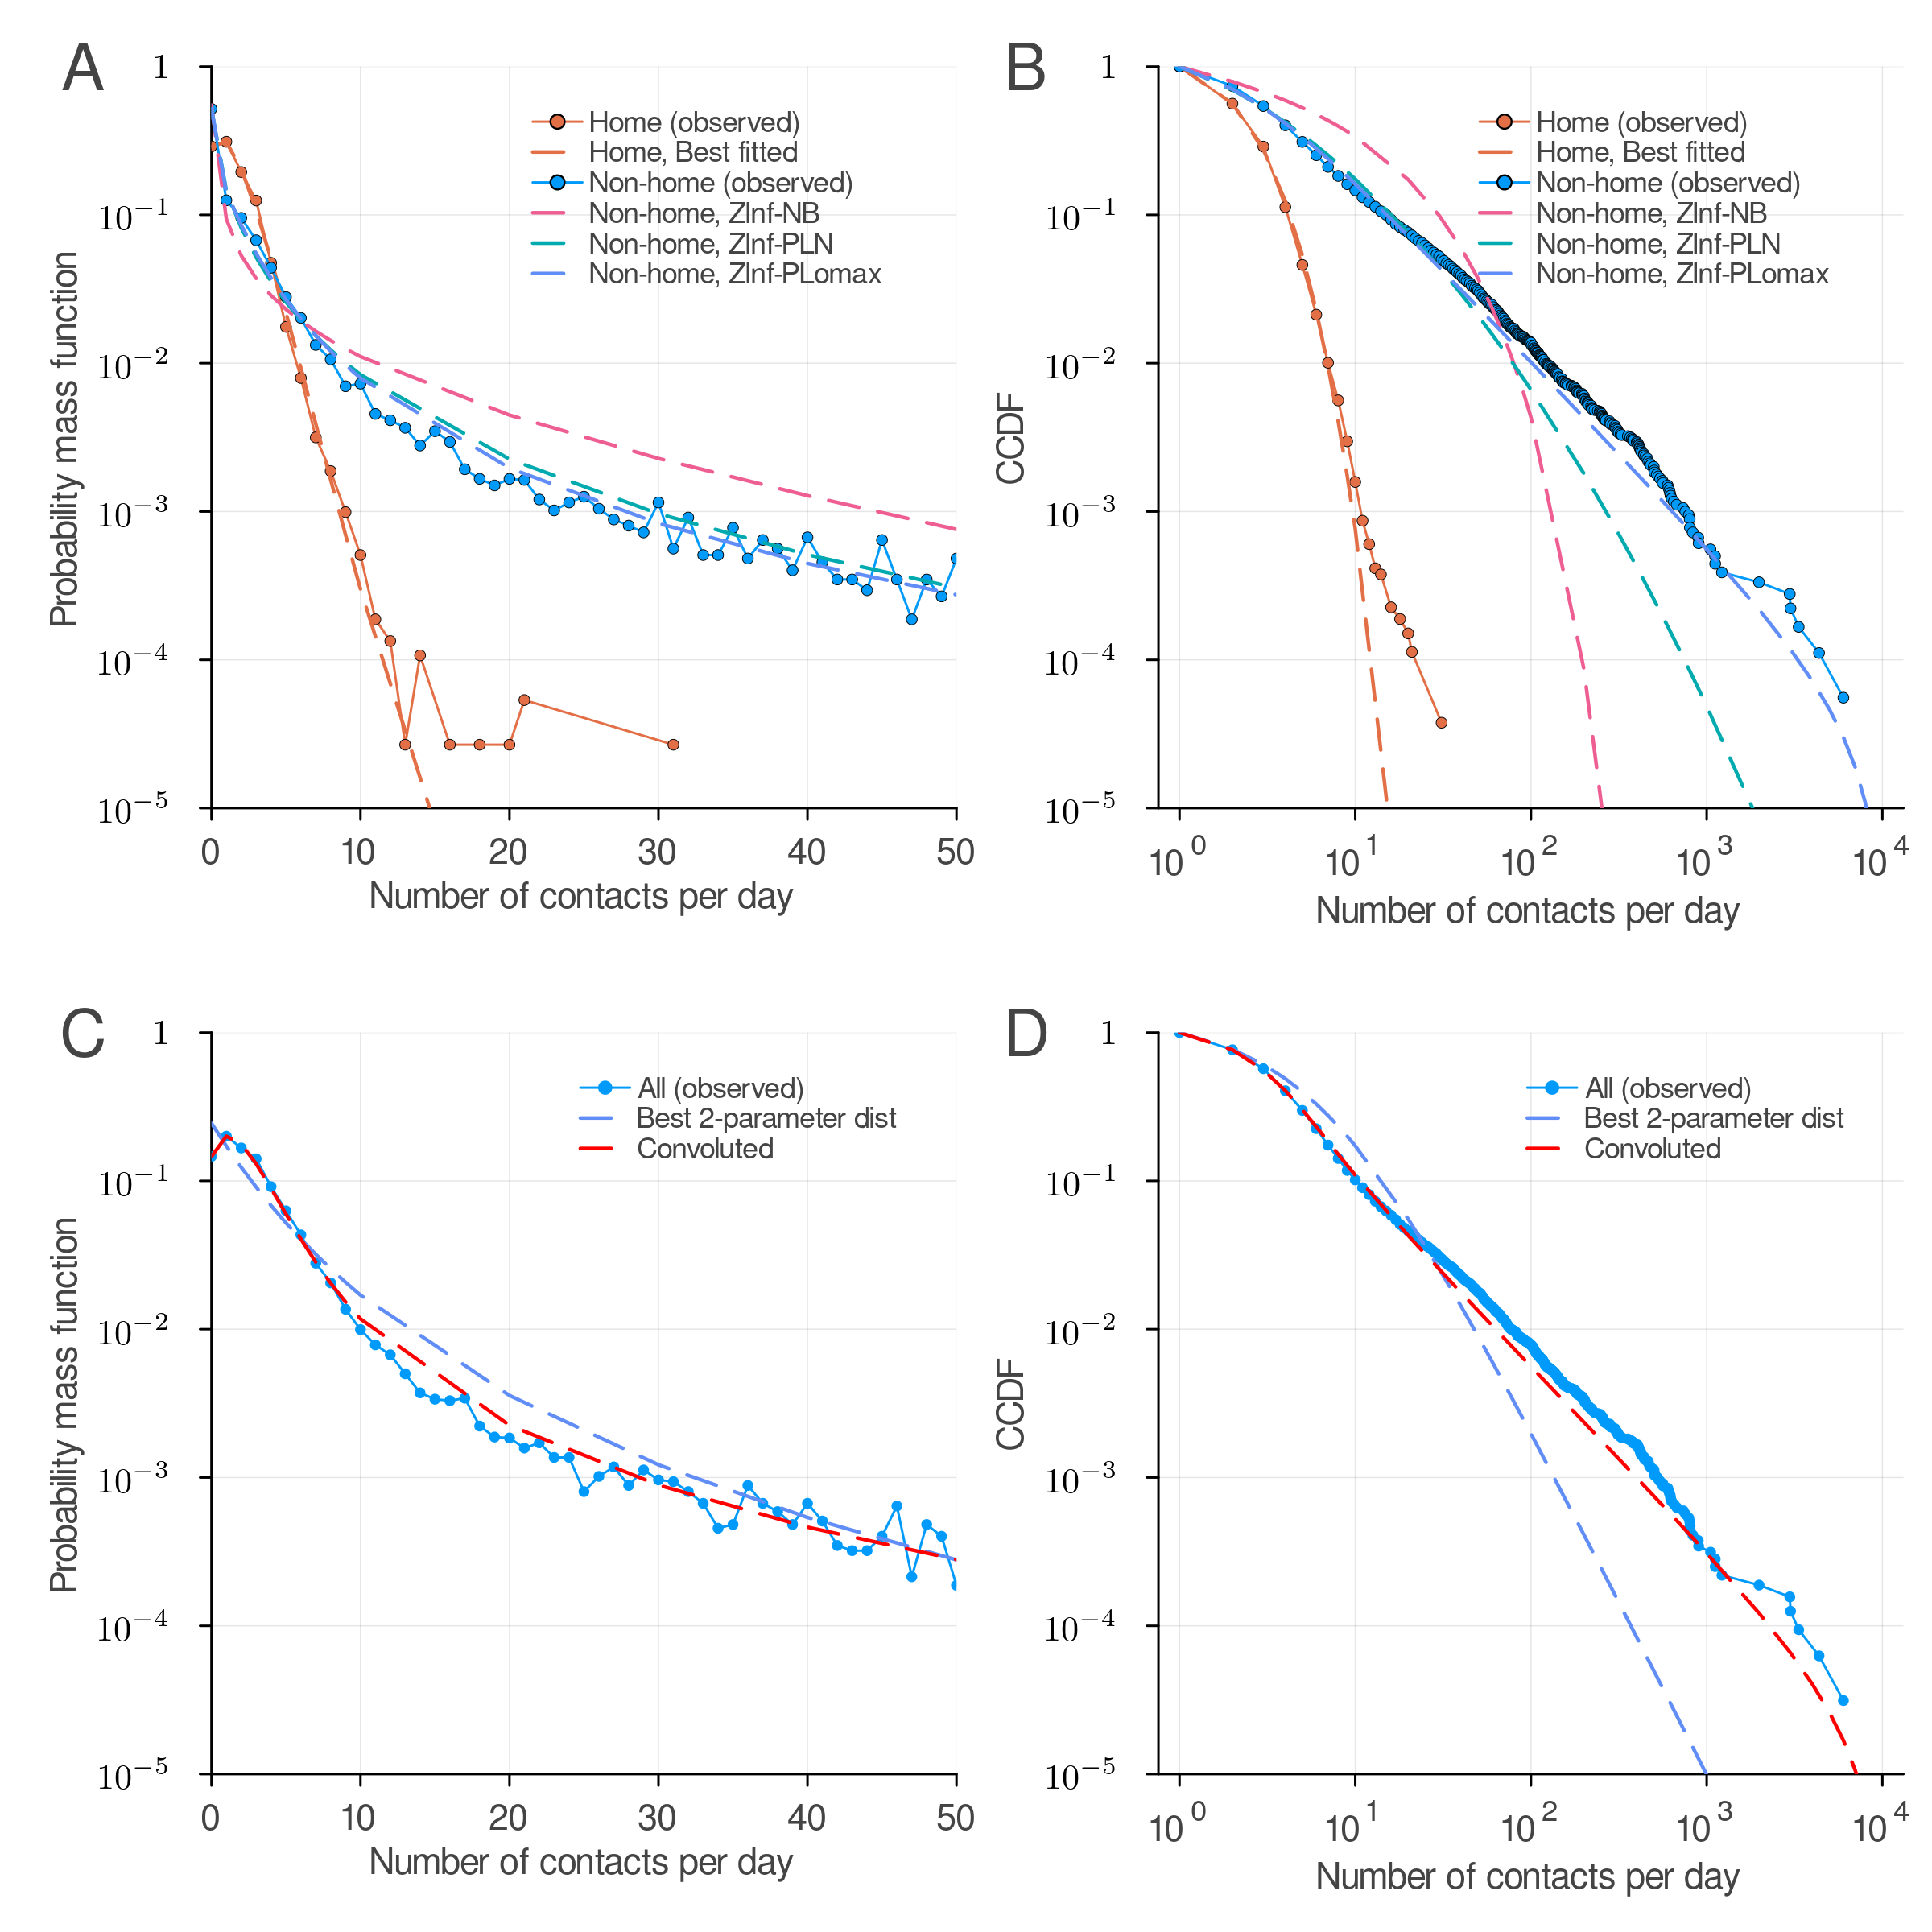

In [ ]:
# TODO: add Poisson-dpln model.
#     Please refer to https://royalsocietypublishing-org.ez.lshtm.ac.uk/rsif/article/9/76/2826/36275/Social-encounter-networks-collective-properties
include("main_utils.jl")
include("comix2_utils.jl")
pl = plot_conv_fit()
savefig(pl, "../fig/comix2_conv.png")
pl

## Simulation analysis

In [30]:
include("main_utils.jl")
include("data_setup.jl")
include("comix2_utils.jl")


plot_WAIC_setting (generic function with 1 method)

In [40]:
# TODO: add bootstrap simulation code

In [42]:
include("comix2_utils.jl")
dd_all, dd_hm, dd_nhm = get_comix2_dd_all_hm_nhm()
df_mer = simulate_and_take_sample_mean();

M_lis = [100, 1_000, 10_000, 37347]
paths = [
    "../dt_intermediate_bootstrap/comix2_$(M)samples_100repeat.jld2"
    for M in M_lis ]
df_sum = parse_bootstrap_estimated_data(paths);

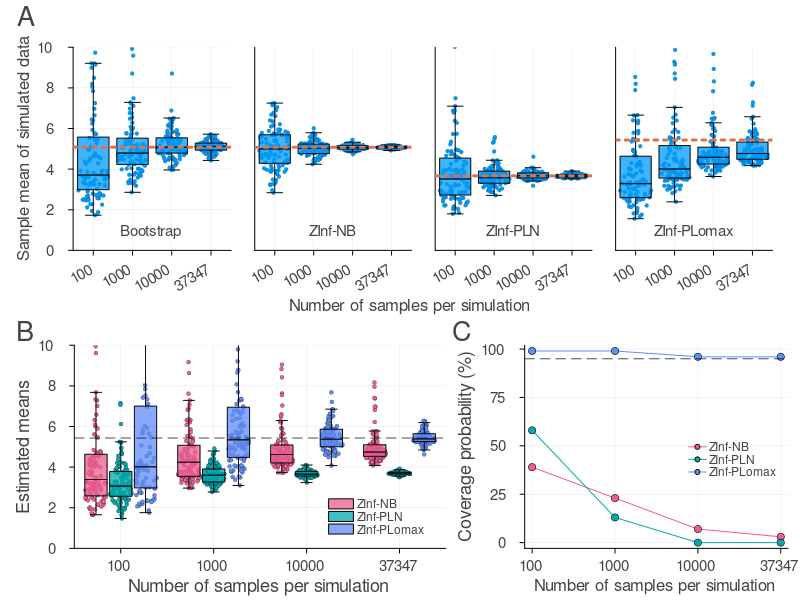

In [75]:
include("comix2_utils.jl")
df_mer[!, :sample_size] = string.(df_mer[:, :sample_size])
pl1 = plot_simulated_sample_mean(df_mer)
pl2 = plot_estimated_means(df_sum);
pl3 = plot_coverage_prob(df_sum);

annotate!(pl2, (-0.15, 1.07), text("B", :left, 18, "Helvetica"))
annotate!(pl3, (-0.27, 1.07), text("C", :left, 18, "Helvetica"))
plot!(pl2, left_margin=5Plots.mm)

layout = @layout [a; b c{0.4w}]
pl = plot(pl1, pl2, pl3,  layout=layout, size=(800, 600))
savefig(pl, "../fig/comix2_bootstrap_simulation.png")
pl

## Setting-stratified analysis
TODO: will be removed from the code. 

In [41]:
df_dd = read_comix2_setting_strat();

Number of removing ids: 0


Row,strat,n_answer,n0,n1more
,String,Int64,Int64,Int64
1,cnt_work,37347,28700,8647
2,cnt_school,37347,35494,1853
3,cnt_transport,37347,36024,1323
4,cnt_leisure,37347,36510,837
5,cnt_other,37347,24040,13307
6,non-home,37347,19353,17994


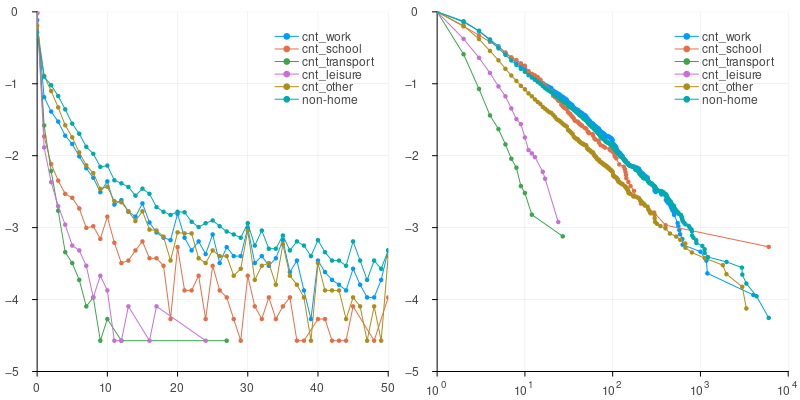

In [32]:
@pipe groupby(df_dd, [:strat]) |> combine(_) do gdf
    n_answer = gdf[:, :y] |> sum
    n0 = gdf[gdf.x .== 0, :y][1]
    (n_answer = n_answer, n0=n0, n1more = n_answer -n0)
end |> display

pl1 = plot_pdf_across_survey(df_dd; col=:strat)
pl2 = plot_ccdf_across_survey(df_dd; col = :strat)
plot(pl1, pl2, size=(800, 400))

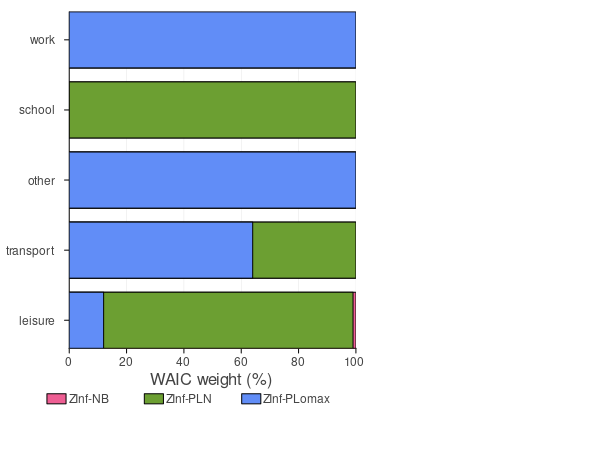

In [ ]:
include("comix2_utils.jl")
# fit_settings(df_dd)
df_res = get_df_res_setting();
plot_WAIC_setting(df_dd, df_res)